Se importan las bibliotecas necesarias.
Se carga el dataset para poder hacer un tratamiento de datos.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("diabetes_dataset.csv")
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


Traducimos los nombres de las columnas de la tabla

In [3]:
df.columns = ["Genero", "Edad", "Hipertension", "Cardiopatia", "Historial_fumador", "IMC", "Nivel_HnA1c", "Glucosa_en_sangre", "Diabetes"]
df

,Genero,Edad,Hipertencion,Cardiopatia,Historial_fumador,IMC,Nivel_HnA1c,Glucosa_en_sangre,Diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


Se eliminan las filas que no contienen informacion sobre su historial de fumadores

In [4]:
df = df[df["Historial_fumador"] != "No Info"]
df

,Genero,Edad,Hipertencion,Cardiopatia,Historial_fumador,IMC,Nivel_HnA1c,Glucosa_en_sangre,Diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
...,...,...,...,...,...,...,...,...,...
99992,Female,26.0,0,0,never,34.34,6.5,160,0
99993,Female,40.0,0,0,never,40.69,3.5,155,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


Ahora eliminaremos el indice anterior y se creara uno nuevo de forma ascendente

In [5]:
df = df.reset_index(drop=True)
df

,Genero,Edad,Hipertencion,Cardiopatia,Historial_fumador,IMC,Nivel_HnA1c,Glucosa_en_sangre,Diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Male,28.0,0,0,never,27.32,5.7,158,0
2,Female,36.0,0,0,current,23.45,5.0,155,0
3,Male,76.0,1,1,current,20.14,4.8,155,0
4,Female,20.0,0,0,never,27.32,6.6,85,0
...,...,...,...,...,...,...,...,...,...
64179,Female,26.0,0,0,never,34.34,6.5,160,0
64180,Female,40.0,0,0,never,40.69,3.5,155,0
64181,Male,66.0,0,0,former,27.83,5.7,155,0
64182,Female,24.0,0,0,never,35.42,4.0,100,0


Traduciremos los strings del dataset para una mejor compresion de los datos.

In [6]:
df["Genero"] = df["Genero"].replace({"Male": "Masculino", "Female": "Femenino"})
df["Historial_fumador"] = df["Historial_fumador"].replace({"never": "Nunca", "current": "Actualmente", "former": "Anteriormente"})
df

,Genero,Edad,Hipertencion,Cardiopatia,Historial_fumador,IMC,Nivel_HnA1c,Glucosa_en_sangre,Diabetes
0,Femenino,80.0,0,1,Nunca,25.19,6.6,140,0
1,Masculino,28.0,0,0,Nunca,27.32,5.7,158,0
2,Femenino,36.0,0,0,Actualmente,23.45,5.0,155,0
3,Masculino,76.0,1,1,Actualmente,20.14,4.8,155,0
4,Femenino,20.0,0,0,Nunca,27.32,6.6,85,0
...,...,...,...,...,...,...,...,...,...
64179,Femenino,26.0,0,0,Nunca,34.34,6.5,160,0
64180,Femenino,40.0,0,0,Nunca,40.69,3.5,155,0
64181,Masculino,66.0,0,0,Anteriormente,27.83,5.7,155,0
64182,Femenino,24.0,0,0,Nunca,35.42,4.0,100,0


Utilizaremos Searborn para crear una grafica de la columna "Genero" para mostrar la diferencia entre mujeres y hombres con respecto a la diabetes.

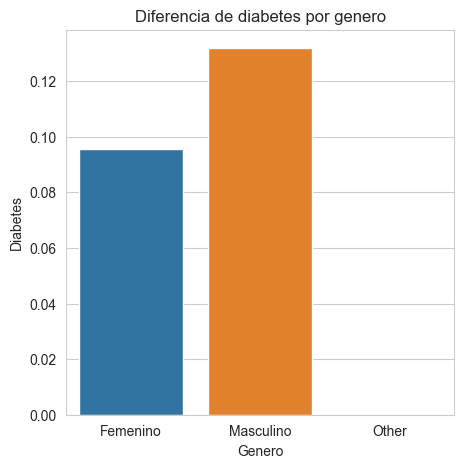

In [7]:
sns.set_style("whitegrid")
plt.figure(figsize=(5, 5))
sns.barplot(data=df, x="Genero", y="Diabetes", errorbar = None)
plt.xlabel("Genero")
plt.ylabel("Diabetes")
plt.title("Diferencia de diabetes por genero")
plt.show()

Se crea un grafico de barras para mostrar graficamente la glucosa en sangre.
En nuestro eje x se encuentra la cantidad de gente que hay en el dataset dependiendo de su glucosa en la sangre.
En el eje y se encuentran intervalos de la cantidad de glucosa.

Text(0.5, 1.0, 'Cantidad de Glucosas en sangre')

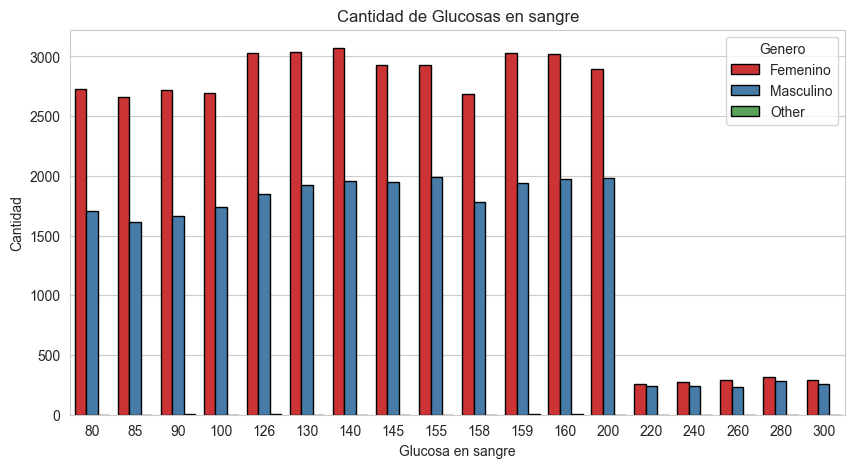

In [8]:
plt.figure(figsize=(10, 5))
sns.countplot(x="Glucosa_en_sangre", hue = "Genero", palette= "Set1", edgecolor = "black", data=df)
plt.xlabel("Glucosa en sangre")
plt.ylabel("Cantidad")
plt.title("Cantidad de Glucosas en sangre")

Grafico que muestra la cantidad de personas por edad en intervalos de 10 años.

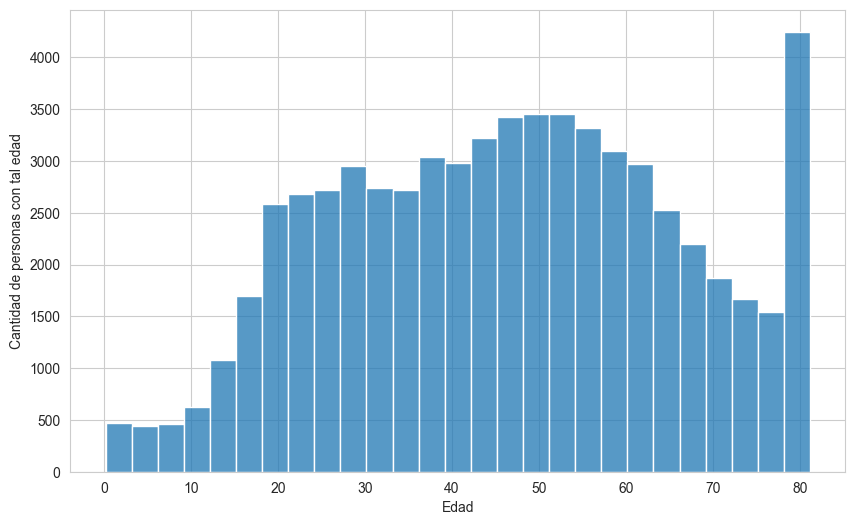

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(x = "Edad", binwidth = 3,  kde_kws = {'bw_adjust': 0.5}, data=df)
plt.ylabel("Cantidad de personas con tal edad")
plt.show()

PRIMER ALGORITMO: se clasificara a los pacientes segun su edad, y mostrara la cantidad de pacientes con o sin diabetes segun rango etario

In [10]:
# Define los rangos de edad
edades = [0, 30, 60, 150]  # Rangos de edad: [0, 30), [30, 60), [60, 150)

# Crea una nueva columna de grupo de edad en el dataset
df['Grupo de Edad'] = pd.cut(df['Edad'], bins=edades, labels=['Jóvenes', 'Adultos', 'Personas Mayores'])

# Calcula la distribución de la diabetes en cada grupo de edad
distribucion = df.groupby('Grupo de Edad')['Diabetes'].value_counts().unstack()


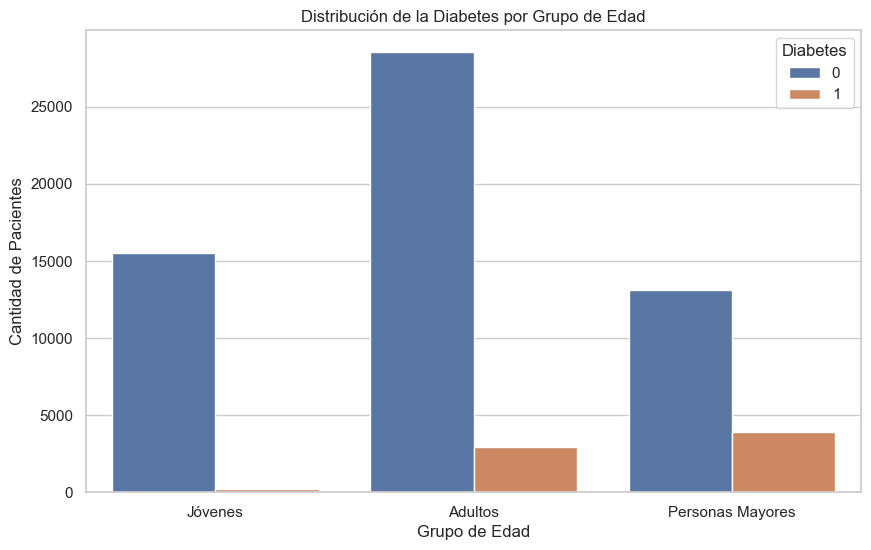

In [11]:


# Configurar estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de distribución
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Grupo de Edad', hue='Diabetes')

# Configurar etiquetas y título del gráfico
plt.xlabel('Grupo de Edad')
plt.ylabel('Cantidad de Pacientes')
plt.title('Distribución de la Diabetes por Grupo de Edad')

# Mostrar el gráfico
plt.show()


FILTRO N2: Relacion IMC  con el diabetes

In [12]:

# Define los rangos de IMC
imc_ranges = [0, 18.5, 25, 30, 100]  # Rangos de IMC: [0, 18.5), [18.5, 25), [25, 30), [30, 100)

# Crea una nueva columna de categoría de IMC en el dataset
df['IMC Categoría'] = pd.cut(df['IMC'], bins=imc_ranges, labels=['Bajo Peso', 'Normal', 'Sobrepeso', 'Obeso'])

# Calcula la distribución de la diabetes en cada categoría de IMC
distribucion_imc = df.groupby('IMC Categoría')['Diabetes'].value_counts().unstack()

distribucion_imc

Diabetes,0,1
IMC Categoría,,
Bajo Peso,1975,48
Normal,14625,756
Sobrepeso,25298,2563
Obeso,15240,3679


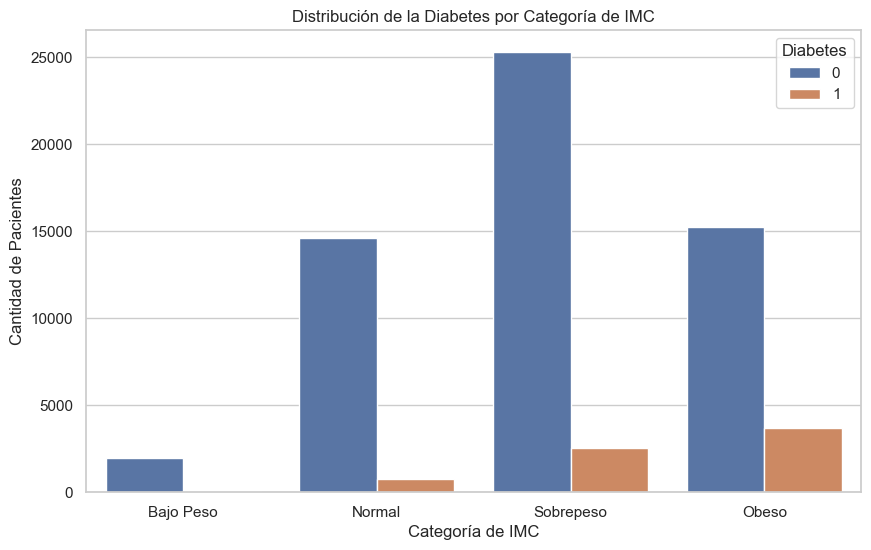

In [13]:
# Configurar estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de distribución
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='IMC Categoría', hue='Diabetes')

# Configurar etiquetas y título del gráfico
plt.xlabel('Categoría de IMC')
plt.ylabel('Cantidad de Pacientes')
plt.title('Distribución de la Diabetes por Categoría de IMC')

# Mostrar el gráfico
plt.show()

Se crea grafico  de personas que tienen o no diabates segun si tienen o no Hipertension

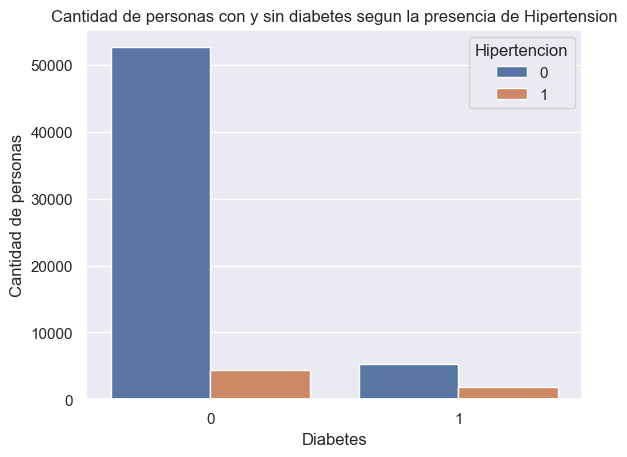

In [17]:
sns.countplot(x="Diabetes", hue="Hipertencion", data=df)

plt.title("Cantidad de personas con y sin diabetes segun la presencia de Hipertension")
plt.xlabel("Diabetes")
plt.ylabel("Cantidad de personas")

plt.show()